Please Reference "Explainable AI in Finance" by Guido Lombardo in ResearchGate.

In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.6/192.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


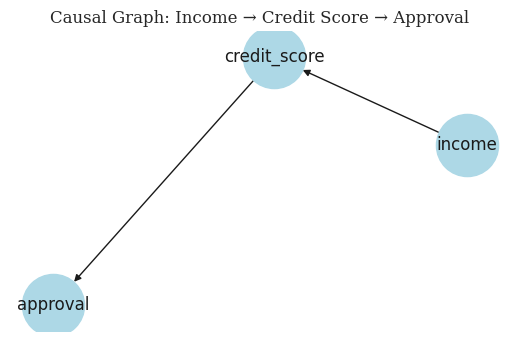

/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Causal Effect Estimate of Income on Approval: -8.127108269695427e-07
Share of individuals improving approval status with +$5k income: 0.26


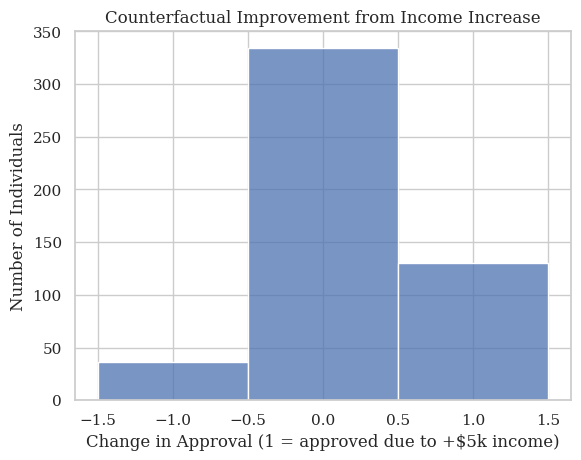

In [ ]:
# Section 2.2: Causal Models and Probabilistic Reasoning (Simulated SCM & Counterfactual)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import dowhy
from dowhy import CausalModel

import seaborn as sns, matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")                 # Seaborn look
plt.rcParams["font.family"] = "DejaVu Serif"     # global serif

# Simulate data with known causal relationships
np.random.seed(42)
n = 500
income = np.random.normal(50000, 10000, n)
credit_score = income / 1000 + np.random.normal(0, 10, n)
approval = (credit_score > 60).astype(int)

data = pd.DataFrame({
    "income": income,
    "credit_score": credit_score,
    "approval": approval
})

# Visualize causal DAG
G = nx.DiGraph()
G.add_edges_from([("income", "credit_score"), ("credit_score", "approval")])
pos = nx.spring_layout(G)
plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, arrows=True)
plt.title("Causal Graph: Income → Credit Score → Approval")
plt.show()

# DoWhy: Define Causal Model
model = CausalModel(
    data=data,
    treatment="income",
    outcome="approval",
    common_causes=["credit_score"]
)

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Effect Estimate of Income on Approval:", estimate.value)

# Counterfactual Explanation: simulate income increase
cf_income = data.copy()
cf_income["income"] += 5000
cf_income["credit_score"] = cf_income["income"] / 1000 + np.random.normal(0, 10, n)
cf_income["approval_pred"] = (cf_income["credit_score"] > 60).astype(int)

# Compare before vs counterfactual approval
improved = (cf_income["approval_pred"] > data["approval"]).mean()
print("Share of individuals improving approval status with +$5k income:", improved)

# Visual plot
sns.histplot(cf_income["approval_pred"] - data["approval"], bins=3, discrete=True)
plt.rcParams["font.family"] = "DejaVu Serif"
plt.title("Counterfactual Improvement from Income Increase")
plt.xlabel("Change in Approval (1 = approved due to +$5k income)")
plt.ylabel("Number of Individuals")
plt.grid(True)
plt.show()


Your loan was denied because your debt ratio was 0.50. If it had been 0.40 or lower, you likely would have been approved.


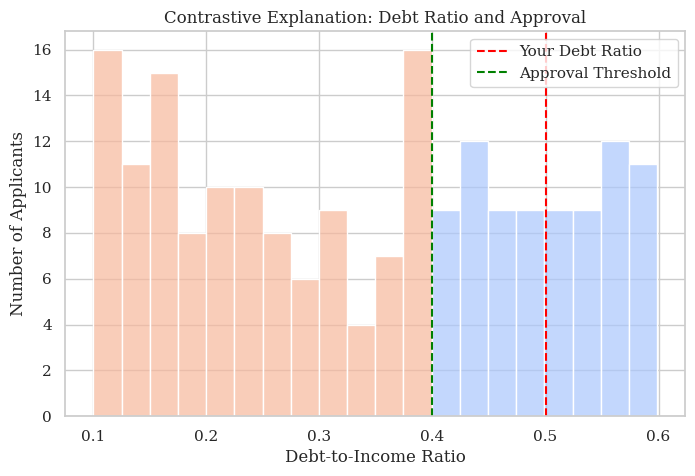

In [ ]:
# Section 2.3: Human Cognitive Biases and Tailoring Explanations (Contrastive Explanation)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(1)
n = 200
debt_ratio = np.random.uniform(0.1, 0.6, n)
approval = (debt_ratio < 0.4).astype(int)

df = pd.DataFrame({'DebtRatio': debt_ratio, 'Approved': approval})

# Define actual point and contrast threshold
actual = 0.5  # debt ratio
threshold = 0.4
contrastive_explanation = f"Your loan was denied because your debt ratio was {actual:.2f}. If it had been {threshold:.2f} or lower, you likely would have been approved."

# Show contrastive explanation
print(contrastive_explanation)

# Visualize explanation
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="DebtRatio", hue="Approved", bins=20, palette='coolwarm', alpha=0.7)
plt.axvline(x=actual, color='red', linestyle='--', label='Your Debt Ratio')
plt.axvline(x=threshold, color='green', linestyle='--', label='Approval Threshold')
plt.title("Contrastive Explanation: Debt Ratio and Approval")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Number of Applicants")
plt.legend()
plt.grid(True)
plt.show()


Estimated MMD between groups: 0.0869


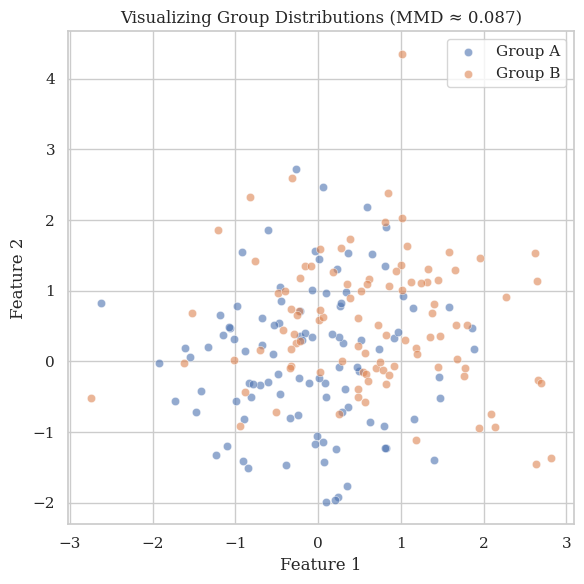

In [ ]:
# Section 3.1: Maximum Mean Discrepancy (MMD) – Visualizing Distribution Differences

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel

# Simulated 2D data for two groups
np.random.seed(42)
X_group1 = np.random.normal(loc=0, scale=1, size=(100, 2))
X_group2 = np.random.normal(loc=0.5, scale=1, size=(100, 2))  # shifted group

# MMD calculation function
def compute_mmd(X, Y, gamma=1.0):
    K_xx = rbf_kernel(X, X, gamma=gamma)
    K_yy = rbf_kernel(Y, Y, gamma=gamma)
    K_xy = rbf_kernel(X, Y, gamma=gamma)
    return K_xx.mean() + K_yy.mean() - 2 * K_xy.mean()

mmd_value = compute_mmd(X_group1, X_group2, gamma=1.0)
print(f"Estimated MMD between groups: {mmd_value:.4f}")

# Visualize the distributions
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_group1[:, 0], y=X_group1[:, 1], label="Group A", alpha=0.6)
sns.scatterplot(x=X_group2[:, 0], y=X_group2[:, 1], label="Group B", alpha=0.6)
plt.title(f"Visualizing Group Distributions (MMD ≈ {mmd_value:.3f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


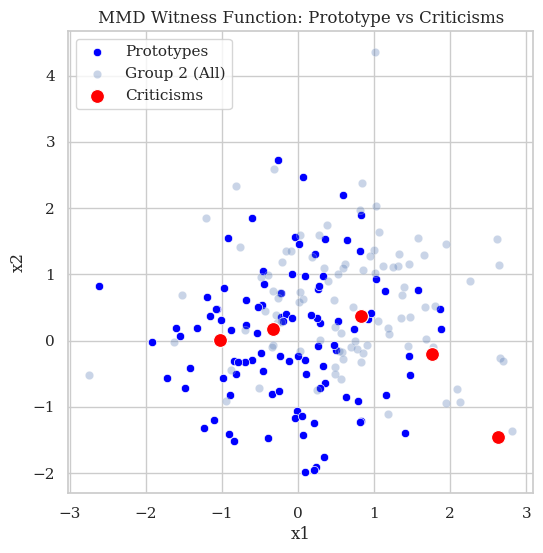

In [ ]:
# Section 3.2.1 & 3.2.2: Prototype & Criticism Selection with MMD Witness Function

from sklearn.metrics.pairwise import pairwise_kernels

def mmd_witness(X, Y, kernel='rbf', gamma=1.0):
    K_xx = pairwise_kernels(X, X, metric=kernel, gamma=gamma)
    K_yy = pairwise_kernels(Y, Y, metric=kernel, gamma=gamma)
    K_xy = pairwise_kernels(X, Y, metric=kernel, gamma=gamma)
    witness = K_xx.mean(axis=0) - K_xy.mean(axis=1)
    return witness

# Select top 5 criticism points in Y (not well represented by X)
witness = mmd_witness(X_group1, X_group2, gamma=1.0)
df_witness = pd.DataFrame(X_group2, columns=['x1', 'x2'])
df_witness['witness'] = witness
df_top = df_witness.iloc[np.argsort(np.abs(witness))[-5:]]

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_group1[:, 0], y=X_group1[:, 1], label="Prototypes", color='blue')
sns.scatterplot(x=X_group2[:, 0], y=X_group2[:, 1], label="Group 2 (All)", alpha=0.3)
sns.scatterplot(data=df_top, x='x1', y='x2', label="Criticisms", color='red', s=100)
plt.title("MMD Witness Function: Prototype vs Criticisms")
plt.legend()
plt.grid(True)
plt.show()


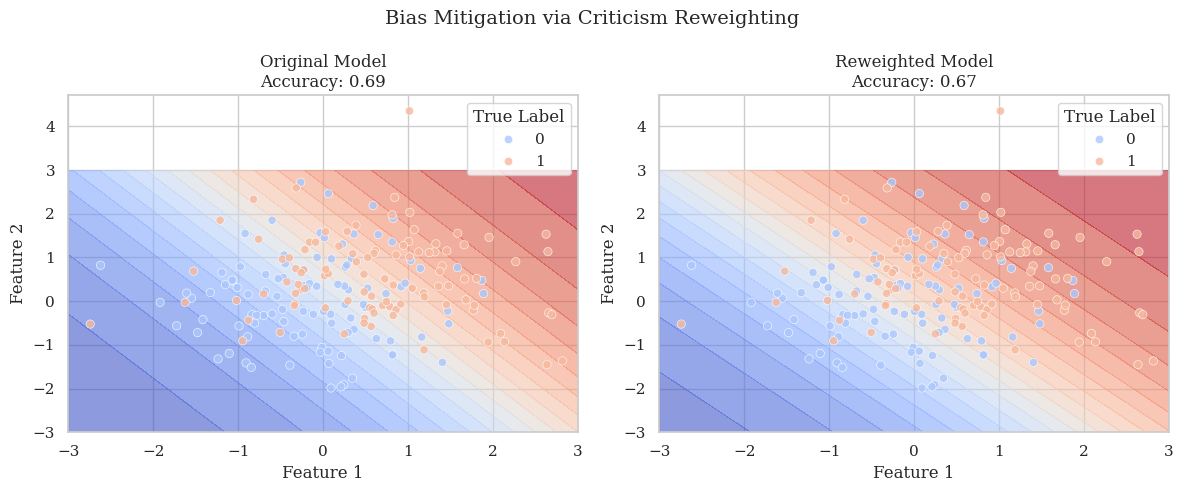

In [ ]:
# Section 3.3.1 – 3.3.3: Bias Mitigation – Visualizing Data Reweighting Impact

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Stack data for classification
X = np.vstack([X_group1, X_group2])
y = np.array([0] * 100 + [1] * 100)

# Model without mitigation
model_orig = LogisticRegression().fit(X, y)
y_pred_orig = model_orig.predict(X)
acc_orig = accuracy_score(y, y_pred_orig)

# Upweight group 2 (criticism group)
weights = np.array([1]*100 + [2]*100)
model_weighted = LogisticRegression().fit(X, y, sample_weight=weights)
y_pred_weighted = model_weighted.predict(X)
acc_weighted = accuracy_score(y, y_pred_weighted)

# Plot decision regions
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z_orig = model_orig.predict_proba(grid)[:, 1].reshape(xx.shape)
Z_weighted = model_weighted.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot: Before mitigation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_orig, levels=20, cmap="coolwarm", alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', alpha=0.8)
plt.title(f"Original Model\nAccuracy: {acc_orig:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="True Label")
plt.grid(True)

# Plot: After mitigation
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_weighted, levels=20, cmap="coolwarm", alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', alpha=0.8)
plt.title(f"Reweighted Model\nAccuracy: {acc_weighted:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="True Label")
plt.grid(True)

plt.suptitle("Bias Mitigation via Criticism Reweighting", fontsize=14)
plt.tight_layout()
plt.show()


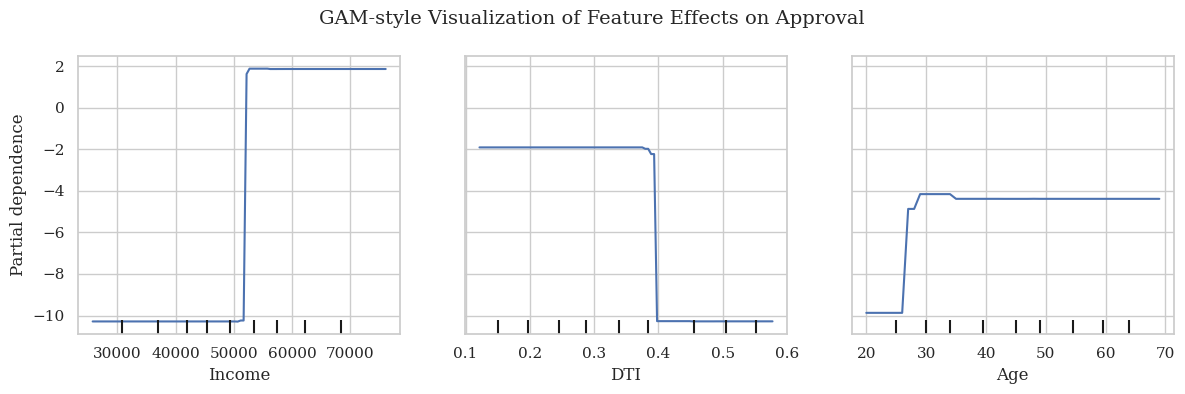

In [ ]:
# Section 4.1: Interpretable Model Architectures (GAM-style visualization)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

# Simulated loan application data
np.random.seed(0)
n = 500
income = np.random.normal(50000, 15000, n)
dti = np.random.uniform(0.1, 0.6, n)
age = np.random.randint(20, 70, n)
approved = ((income > 52000) & (dti < 0.4) & (age > 25)).astype(int)

df = pd.DataFrame({'Income': income, 'DTI': dti, 'Age': age, 'Approved': approved})

# Fit EBM-like model (GAM approximation with gradient boosting)
model = HistGradientBoostingClassifier(max_iter=100).fit(df[['Income', 'DTI', 'Age']], df['Approved'])

# Visualize feature-wise effects
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(model, df[['Income', 'DTI', 'Age']], features=[0, 1, 2], ax=ax)
plt.suptitle("GAM-style Visualization of Feature Effects on Approval", fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-20-f488af006890>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


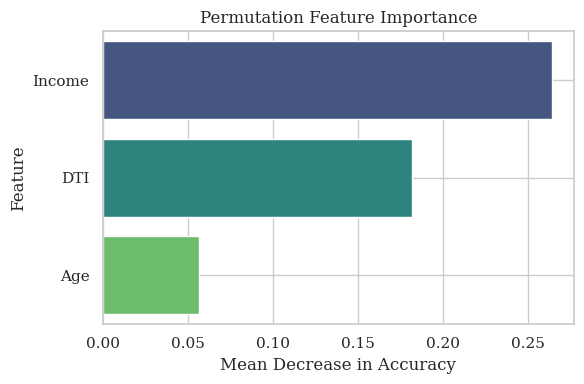

In [ ]:
# Section 4.2.1: Permutation Feature Importance (Visualization)

from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(model, df[['Income', 'DTI', 'Age']], df['Approved'], n_repeats=30, random_state=42)
importance_df = pd.DataFrame({'Feature': ['Income', 'DTI', 'Age'], 'Importance': results.importances_mean})

# Bar plot of feature importances
plt.figure(figsize=(6, 4))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Permutation Feature Importance")
plt.xlabel("Mean Decrease in Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


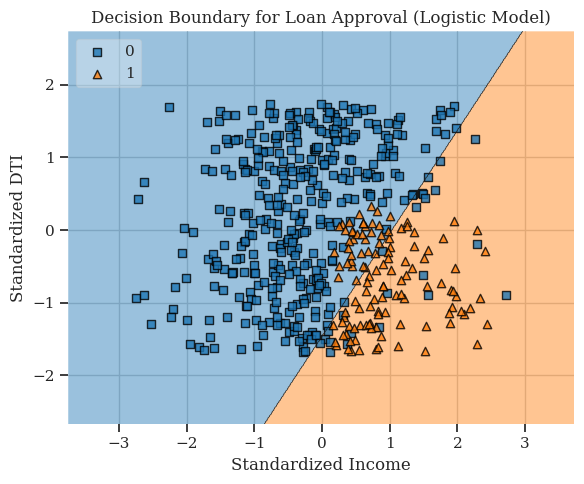

In [ ]:
# Section 4.2.2: Counterfactual Explanation (Visualized Decision Boundary)

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# Simple binary logistic model for visualization
X = df[['Income', 'DTI']].copy()
X['Income'] = (X['Income'] - X['Income'].mean()) / X['Income'].std()
X['DTI'] = (X['DTI'] - X['DTI'].mean()) / X['DTI'].std()
y = df['Approved'].copy()

clf = LogisticRegression().fit(X, y)

# Plot decision boundary
plt.figure(figsize=(6, 5))
plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
plt.xlabel("Standardized Income")
plt.ylabel("Standardized DTI")
plt.title("Decision Boundary for Loan Approval (Logistic Model)")
plt.tight_layout()
plt.show()


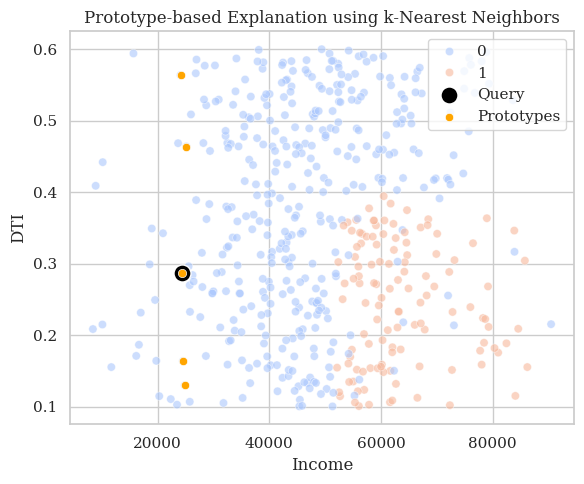

In [ ]:
# Section 4.2.3: Prototype-based Explanation (kNN Similarity)

from sklearn.neighbors import NearestNeighbors

# Select query applicant
query_idx = 42
query = df.loc[[query_idx], ['Income', 'DTI', 'Age']]

# Fit kNN for explanation
knn = NearestNeighbors(n_neighbors=5)
knn.fit(df[['Income', 'DTI', 'Age']])
neighbors = knn.kneighbors(query, return_distance=False)

# Visualize
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Income', y='DTI', hue='Approved', palette='coolwarm', alpha=0.6)
sns.scatterplot(data=query, x='Income', y='DTI', s=150, color='black', label='Query')
sns.scatterplot(data=df.loc[neighbors[0]], x='Income', y='DTI', color='orange', label='Prototypes')
plt.title("Prototype-based Explanation using k-Nearest Neighbors")
plt.grid(True)
plt.tight_layout()
plt.show()


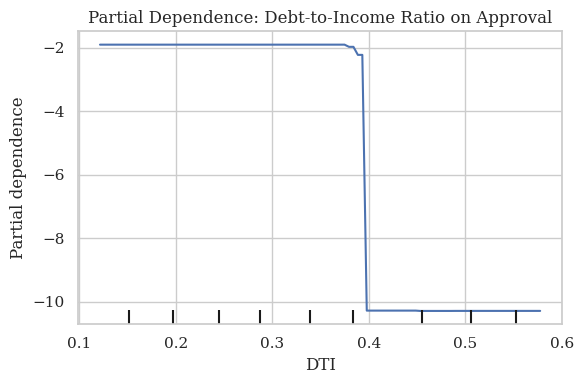

In [ ]:
# Section 4.2.4: Interactive Visualization via Partial Dependence Plots

from sklearn.inspection import PartialDependenceDisplay

# PDP for DTI vs Approval
fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(model, df[['Income', 'DTI', 'Age']], features=['DTI'], ax=ax)
plt.title("Partial Dependence: Debt-to-Income Ratio on Approval")
plt.tight_layout()
plt.show()


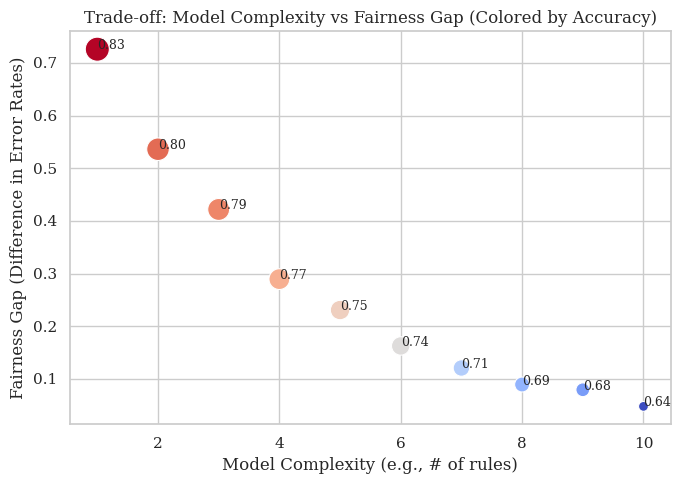

In [ ]:
# Section 4.3.1–4.4.1: Multi-Objective Fairness vs Complexity Trade-off (Pareto Frontier)

import matplotlib.pyplot as plt

# Simulate trade-off data
complexity = np.linspace(1, 10, 10)
fairness_gap = np.exp(-0.3 * complexity) + np.random.normal(0, 0.01, size=10)
accuracy = 0.85 - 0.02 * complexity + np.random.normal(0, 0.005, size=10)

# Plot Pareto frontier
plt.figure(figsize=(7, 5))
sns.scatterplot(x=complexity, y=fairness_gap, size=accuracy, sizes=(50, 300), hue=accuracy, palette='coolwarm', legend=False)
for i in range(len(complexity)):
    plt.text(complexity[i], fairness_gap[i], f'{accuracy[i]:.2f}', fontsize=9)
plt.title("Trade-off: Model Complexity vs Fairness Gap (Colored by Accuracy)")
plt.xlabel("Model Complexity (e.g., # of rules)")
plt.ylabel("Fairness Gap (Difference in Error Rates)")
plt.grid(True)
plt.tight_layout()
plt.show()
